In [1]:
import matplotlib.pyplot as plt
import multipsi as mtp
import veloxchem as vlx

In [2]:
molecule = vlx.Molecule.read_molecule_string("He   0.000  0.000  0.000")
basis = vlx.MolecularBasis.read(molecule, "cc-pvtz", ostream=None)

In [3]:
scf_drv = vlx.ScfRestrictedDriver()
scf_drv.ostream.mute()
scf_results = scf_drv.compute(molecule, basis)

energies = {}
energies["HF"] = scf_drv.get_scf_energy()

In [4]:
mp2_drv = vlx.Mp2Driver()
mp2_drv.ostream.mute()
mp2_results = mp2_drv.compute(molecule, basis, scf_drv.mol_orbs)

energies["MP2"] = mp2_results["mp2_energy"] + energies["HF"]

In [5]:
space = mtp.OrbSpace(molecule, scf_drv.mol_orbs)
space.fci()

ci_drv = mtp.CIDriver()
ci_drv.ostream.mute()

ci_results = ci_drv.compute(molecule, basis, space)

energies["FCI"] = ci_results["energies"][0]

In [6]:
for xcfun in vlx.available_functionals():
    scf_drv.xcfun = xcfun
    scf_drv.compute(molecule, basis)
    
    energies[xcfun] = scf_drv.get_scf_energy()

In [7]:
for method in energies.keys():
    print(f"    {method:<12s}: {energies[method]:16.8f} a.u.")

    HF          :      -2.86115334 a.u.
    MP2         :      -2.89429091 a.u.
    FCI         :      -2.90023217 a.u.
    SLATER      :      -2.72271178 a.u.
    SLDA        :      -2.87143717 a.u.
    B88X        :      -2.86247050 a.u.
    BLYP        :      -2.90621759 a.u.
    B3LYP       :      -2.91450655 a.u.
    BHANDH      :      -2.83473781 a.u.
    BHANDHLYP   :      -2.90514866 a.u.
    PBE         :      -2.89213590 a.u.
    PBE0        :      -2.89451563 a.u.
    REVPBE      :      -2.90710482 a.u.
    BP86        :      -2.90557480 a.u.
    PW91        :      -2.89919908 a.u.
    MPW1K       :      -2.90521521 a.u.
    OLYP        :      -2.90644600 a.u.
    O3LYP       :      -2.90951647 a.u.
    X3LYP       :      -2.90758515 a.u.
    B97         :      -2.90931588 a.u.
    B97-1       :      -2.90639481 a.u.
    B97-2       :      -2.90940855 a.u.
    B97-3       :      -2.91133188 a.u.
    WB97X-D4    :      -2.91197053 a.u.
    WB97M-D4    :      -2.90721813 a.u.


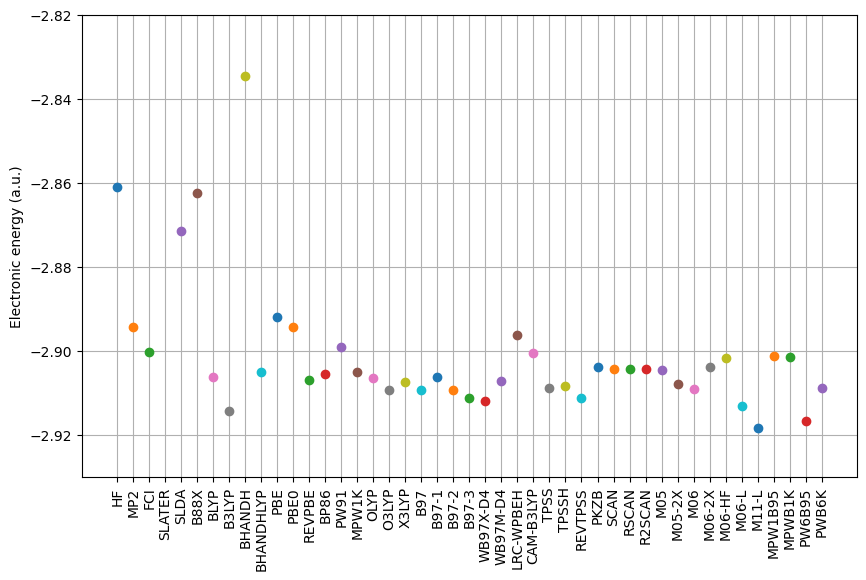

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

for i, method in enumerate(energies.keys()):
    ax.plot(i, energies[method], "o")

ax.set_xticks(range(len(energies)), energies.keys())
plt.xticks(rotation=90)

ax.set_ylim(-2.93, -2.82)
plt.ylabel("Electronic energy (a.u.)")

plt.grid(True)
plt.show()